In [1]:
from scipy.stats import norm, cauchy, logistic
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Zadanie 1

In [8]:
def est_1(theta_hat):
    return theta_hat.mean()

def est_2(theta_hat):
    return np.median(theta_hat)

def est_3(theta_hat, weights_unbiased_3):
    weights_3 = weights_unbiased_3 / weights_unbiased_3.sum()
    return np.sum(weights_3 * theta_hat)

_weight_4_cache = {}

def weight_4_gen(i, n):
    return norm.pdf(norm.ppf((i - 1) / n)) - norm.pdf(norm.ppf(i / n))

def get_weights_4(n):
    if n not in _weight_4_cache:
        _weight_4_cache[n] = np.array([weight_4_gen(i, n) for i in range(1, n + 1)])
    return _weight_4_cache[n]

def est_4(theta_hat, n):
    theta_hat_sorted = np.sort(theta_hat)
    weights_4 = get_weights_4(n)  # Use cached weights
    return np.sum(theta_hat_sorted * weights_4)

def est_5(theta_hat, n):
    return n / np.sum(1 / theta_hat)

def est_6(theta_hat):
    return np.cbrt(np.sum(theta_hat ** 3) / len(theta_hat))

def est_7(theta_hat):
    return np.power(np.sum(theta_hat ** 2) / len(theta_hat), 1/2)

def calculate_statistics(results_df, true_theta):
    """
    Calculate variance, bias, and MSE for each estimator

    Variance: Var(θ̂) = E[(θ̂ - E[θ̂])²]
    Bias: Bias(θ̂) = E[θ̂] - θ
    MSE: MSE(θ̂) = Var(θ̂) + Bias²(θ̂)
    """
    stats = {}
    for col in results_df.columns:
        estimates = results_df[col].values

        # Variance
        variance = np.var(estimates, ddof=1)

        # Bias
        bias = np.mean(estimates) - true_theta

        # MSE
        mse = variance + bias**2

        stats[col] = {
            'Variance': variance,
            'Bias': bias,
            'MSE': mse
        }

    stats_df = pd.DataFrame(stats).T
    return stats_df

def run_simulation(theta, sigma, n, num_simulations=10000, exclude_est5=False):
    """
    Run simulation for given parameters and return results with statistics
    """
    weights_unbiased_3 = np.random.rand(n)

    num_estimators = 6 if exclude_est5 else 7
    res = np.empty((num_simulations, num_estimators))

    for i in range(num_simulations):
        theta_hat = norm.rvs(theta, sigma, n)

        if exclude_est5:
            res[i] = [
                est_1(theta_hat),
                est_2(theta_hat),
                est_3(theta_hat, weights_unbiased_3),
                est_4(theta_hat, n),
                est_6(theta_hat),
                est_7(theta_hat)
            ]
        else:
            res[i] = [
                est_1(theta_hat),
                est_2(theta_hat),
                est_3(theta_hat, weights_unbiased_3),
                est_4(theta_hat, n),
                est_5(theta_hat, n),
                est_6(theta_hat),
                est_7(theta_hat)
            ]

    if exclude_est5:
        columns = ['Est1', 'Est2', 'Est3', 'Est4', 'Est6', 'Est7']
    else:
        columns = ['Est1', 'Est2', 'Est3', 'Est4', 'Est5', 'Est6', 'Est7']

    res_df = pd.DataFrame(res, columns=columns)
    stats_df = calculate_statistics(res_df, theta)

    return res_df, stats_df

## Initial exploration with θ=0, σ=1, n=50

In [9]:
theta = 0
sigma = 1
n = 50

res_df, stats_df = run_simulation(theta, sigma, n, num_simulations=1000, exclude_est5=False)

print(f"Statistics for θ={theta}, σ={sigma}, n={n}")
print(stats_df)

Statistics for θ=0, σ=1, n=50
          Variance      Bias           MSE
Est1      0.019505  0.012000      0.019649
Est2      0.030594  0.011400      0.030724
Est3      0.024965  0.013347      0.025143
Est4      0.009910  0.972784      0.956219
Est5  36237.859119  7.445527  36293.294985
Est6      0.510856  0.043961      0.512788
Est7      0.010118  0.996901      1.003930


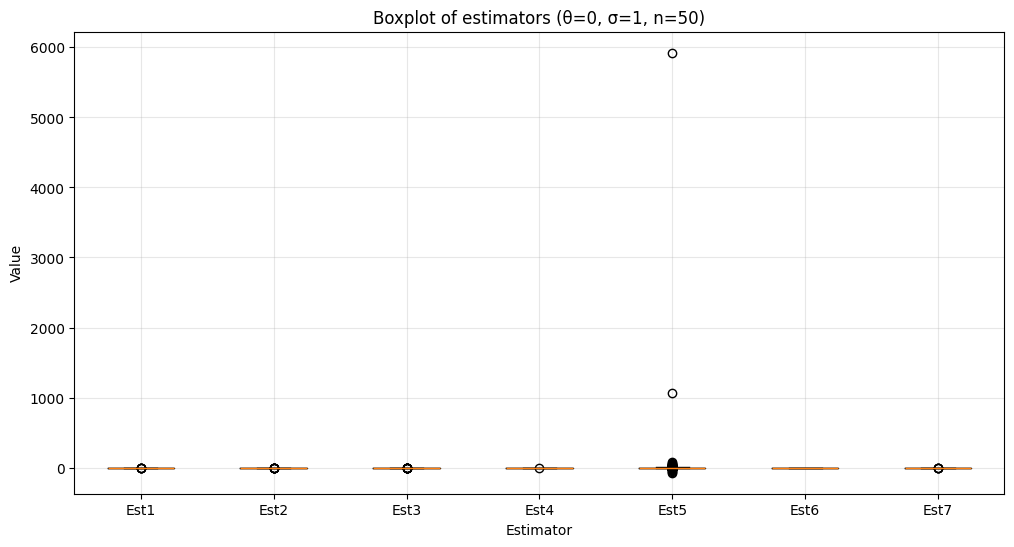

In [10]:
plt.figure(figsize=(12, 6))
plt.boxplot(res_df)
plt.title(f'Boxplot of estimators (θ={theta}, σ={sigma}, n={n})')
plt.xlabel('Estimator')
plt.ylabel('Value')
plt.gca().set_xticklabels(res_df.columns)
plt.grid(True, alpha=0.3)
plt.show()

In [11]:
# Without estimator 5 (harmonic mean - causes issues with values near 0)
res_df_no5, stats_df_no5 = run_simulation(theta, sigma, n, num_simulations=1000, exclude_est5=True)

print(f"\nStatistics without θ̂₅ for θ={theta}, σ={sigma}, n={n}")
print(stats_df_no5)


Statistics without θ̂₅ for θ=0, σ=1, n=50
      Variance      Bias       MSE
Est1  0.020025 -0.000077  0.020025
Est2  0.031063  0.000798  0.031064
Est3  0.025581 -0.001012  0.025582
Est4  0.010073  0.973143  0.957081
Est6  0.518142  0.010209  0.518246
Est7  0.010441  0.996984  1.004419


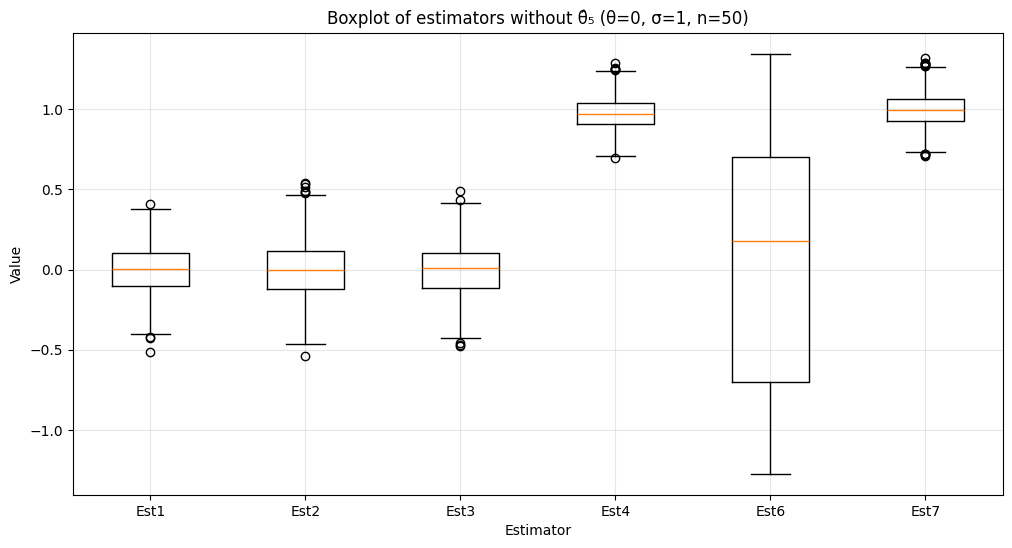

In [12]:
plt.figure(figsize=(12, 6))
plt.boxplot(res_df_no5)
plt.title(f'Boxplot of estimators without θ̂₅ (θ={theta}, σ={sigma}, n={n})')
plt.xlabel('Estimator')
plt.ylabel('Value')
plt.gca().set_xticklabels(res_df_no5.columns)
plt.grid(True, alpha=0.3)
plt.show()


## Complete analysis for different n, θ, and σ combinations


Parameters: n=20, θ=0, σ=1

Statistics:
      Variance    Bias     MSE
Est1    0.0494  0.0030  0.0494
Est2    0.0721  0.0043  0.0721
Est3    0.0697  0.0064  0.0698
Est4    0.0239  0.9312  0.8911
Est6    0.6773  0.0094  0.6774
Est7    0.0252  0.9868  0.9990


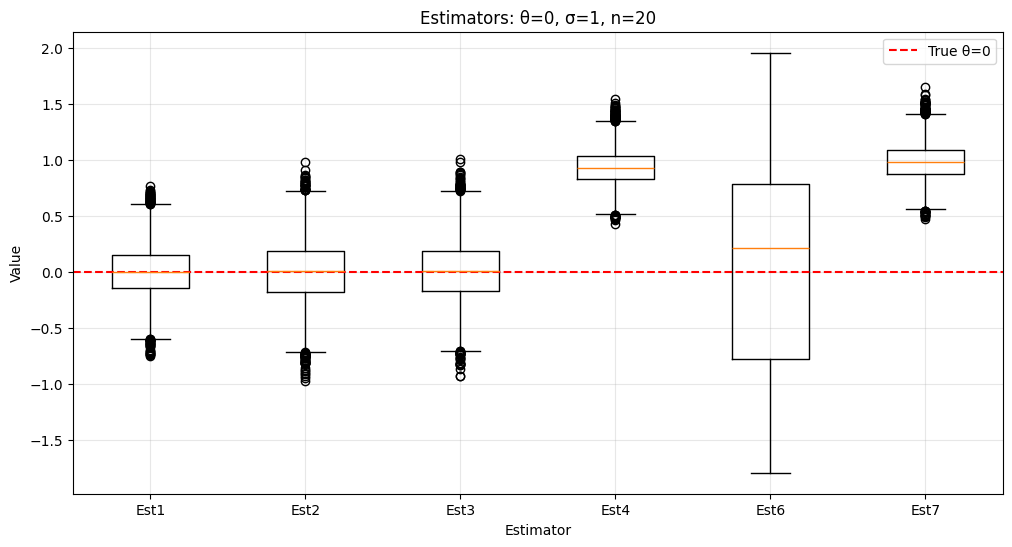


Parameters: n=20, θ=0, σ=2

Statistics:
      Variance    Bias     MSE
Est1    0.2005  0.0017  0.2005
Est2    0.2970  0.0034  0.2970
Est3    0.2713  0.0003  0.2713
Est4    0.0951  1.8652  3.5739
Est6    2.7276 -0.0155  2.7278
Est7    0.1009  1.9775  4.0114


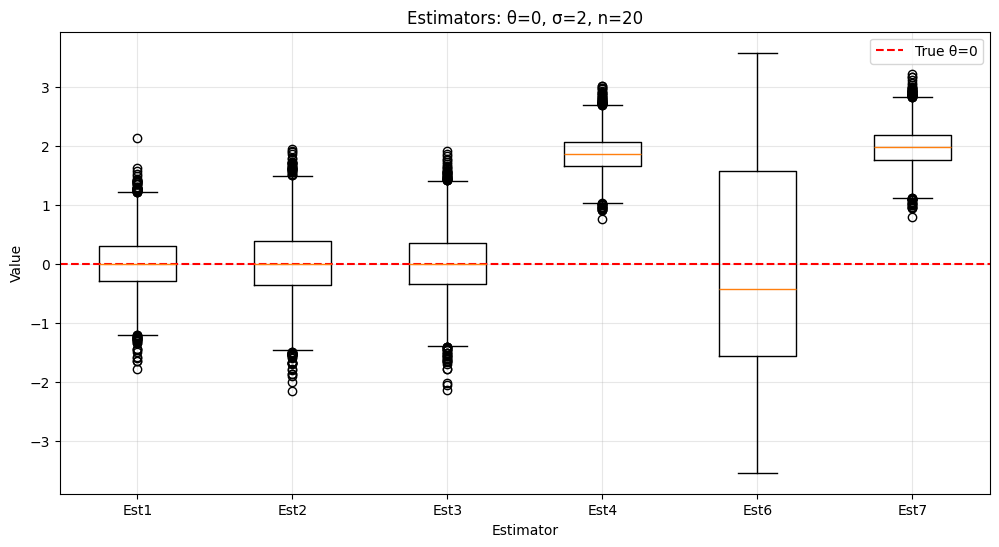


Parameters: n=20, θ=4, σ=1

Statistics:
      Variance    Bias     MSE
Est1    0.0500  0.0001  0.0500
Est2    0.0734  0.0023  0.0734
Est3    0.0680  0.0006  0.0680
Est4    0.0236 -3.0666  9.4275
Est6    0.0504  0.2249  0.1009
Est7    0.0488  0.1178  0.0626


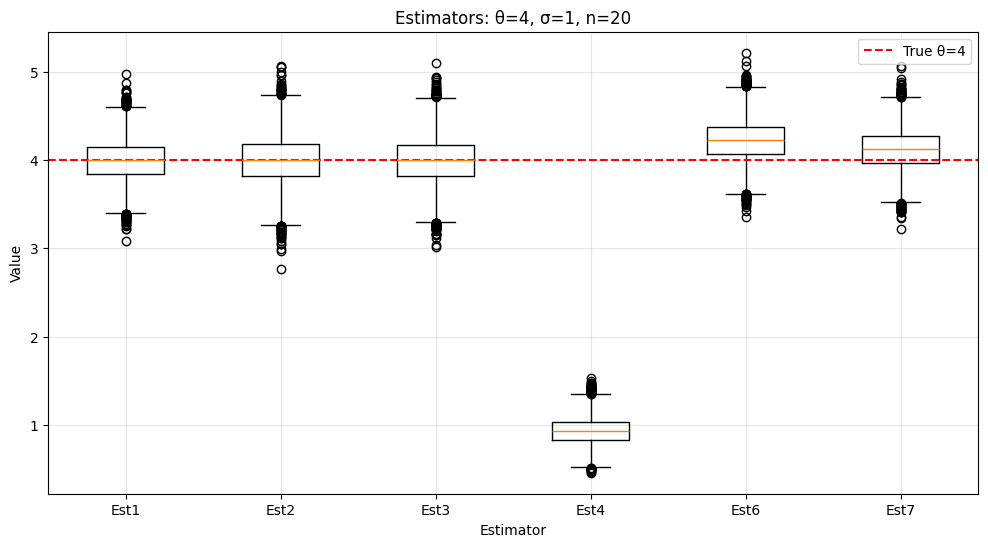


Parameters: n=20, θ=4, σ=2

Statistics:
      Variance    Bias     MSE
Est1    0.1942 -0.0010  0.1942
Est2    0.2857 -0.0024  0.2857
Est3    0.2604 -0.0005  0.2604
Est4    0.0932 -2.1323  4.6400
Est6    0.1949  0.7815  0.8056
Est7    0.1759  0.4528  0.3809


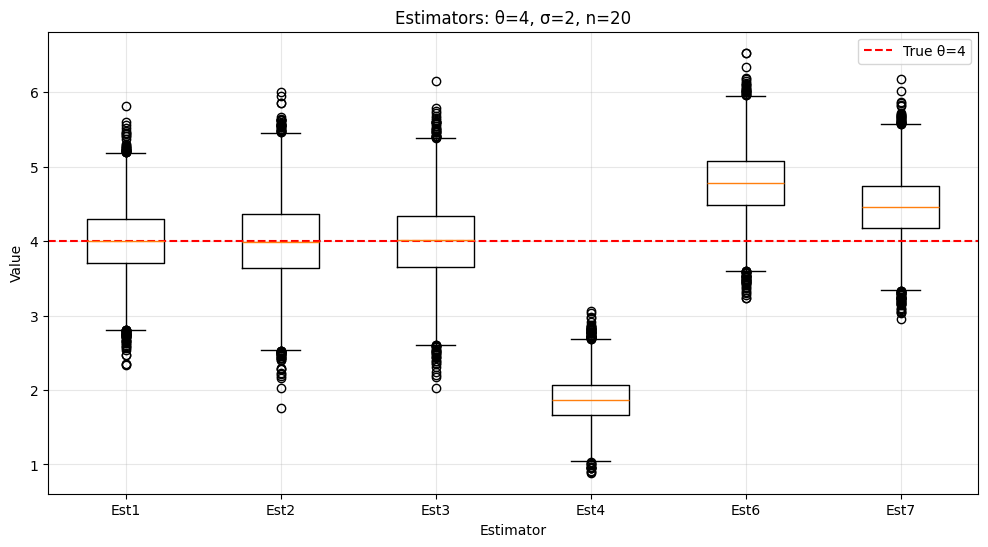


Parameters: n=50, θ=0, σ=1

Statistics:
      Variance    Bias     MSE
Est1    0.0200  0.0003  0.0200
Est2    0.0303  0.0001  0.0303
Est3    0.0298 -0.0005  0.0298
Est4    0.0097  0.9723  0.9551
Est6    0.5220 -0.0039  0.5220
Est7    0.0099  0.9964  1.0027


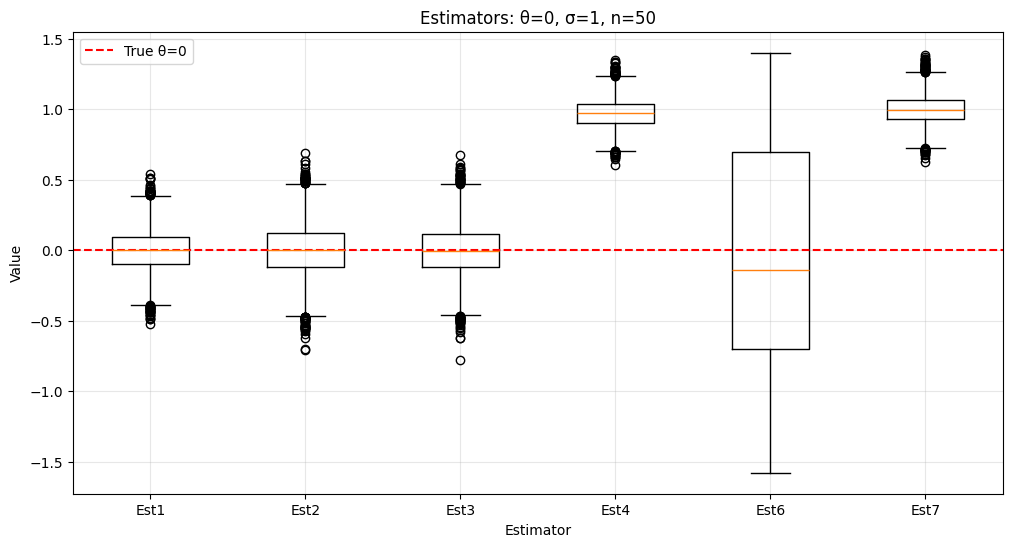


Parameters: n=50, θ=0, σ=2

Statistics:
      Variance    Bias     MSE
Est1    0.0797 -0.0004  0.0797
Est2    0.1209  0.0000  0.1209
Est3    0.1085 -0.0035  0.1085
Est4    0.0384  1.9389  3.7976
Est6    2.0949 -0.0180  2.0952
Est7    0.0395  1.9871  3.9879


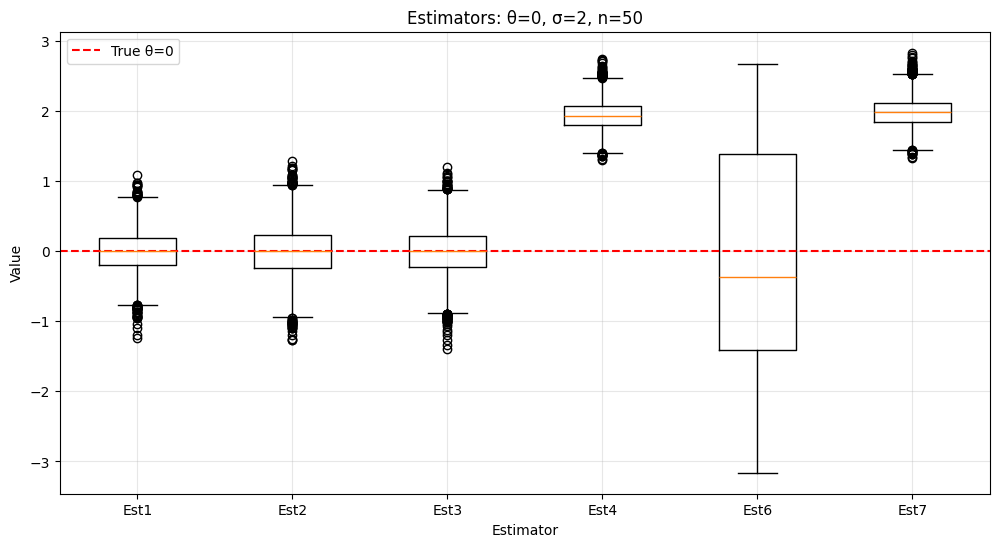


Parameters: n=50, θ=4, σ=1

Statistics:
      Variance    Bias     MSE
Est1    0.0196 -0.0002  0.0196
Est2    0.0301 -0.0003  0.0301
Est3    0.0250 -0.0008  0.0250
Est4    0.0094 -3.0308  9.1950
Est6    0.0196  0.2301  0.0725
Est7    0.0191  0.1201  0.0335


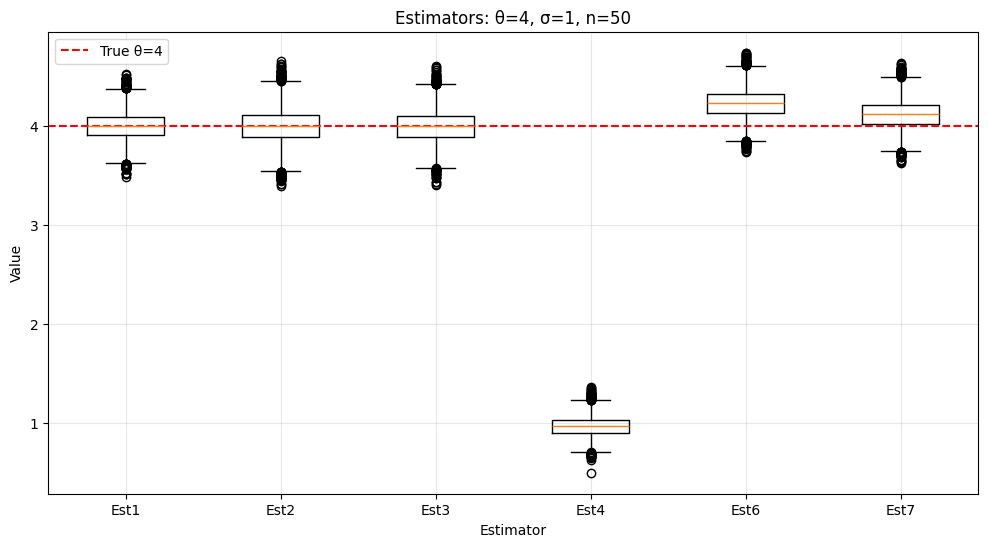


Parameters: n=50, θ=4, σ=2

Statistics:
      Variance    Bias     MSE
Est1    0.0807  0.0047  0.0808
Est2    0.1210  0.0062  0.1211
Est3    0.1061  0.0068  0.1062
Est4    0.0394 -2.0580  4.2749
Est6    0.0808  0.8077  0.7331
Est7    0.0729  0.4684  0.2924


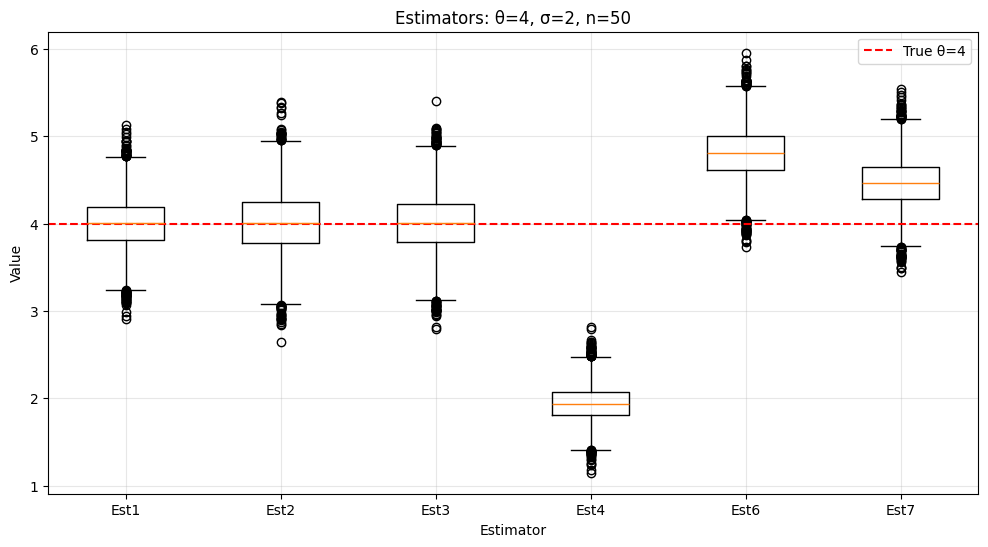


Parameters: n=100, θ=0, σ=1

Statistics:
      Variance    Bias     MSE
Est1    0.0100  0.0014  0.0100
Est2    0.0150  0.0019  0.0150
Est3    0.0141  0.0012  0.0141
Est4    0.0049  0.9850  0.9752
Est6    0.4228  0.0057  0.4229
Est7    0.0050  0.9976  1.0003


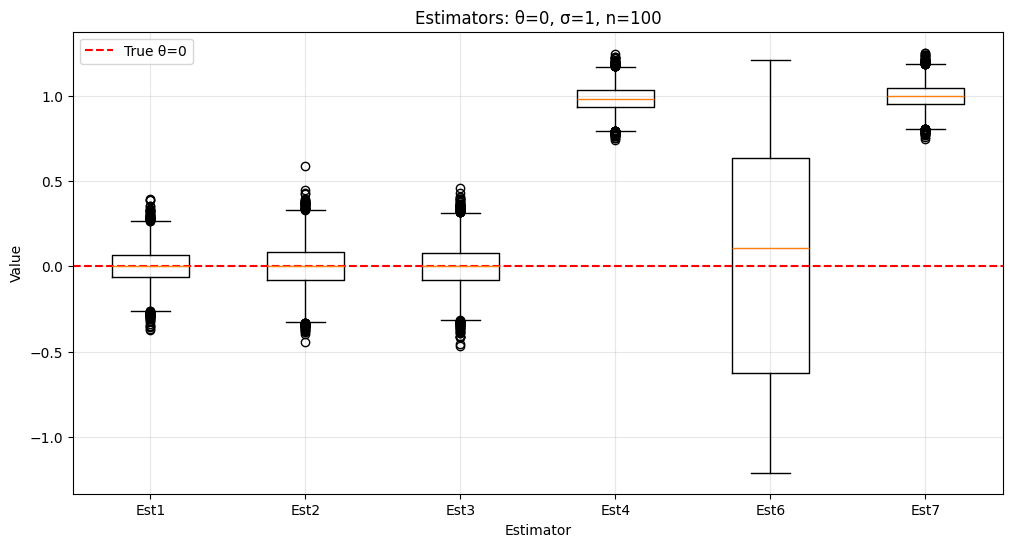


Parameters: n=100, θ=0, σ=2

Statistics:
      Variance    Bias     MSE
Est1    0.0404  0.0023  0.0404
Est2    0.0623  0.0024  0.0623
Est3    0.0533  0.0009  0.0533
Est4    0.0200  1.9704  3.9025
Est6    1.6898  0.0066  1.6898
Est7    0.0203  1.9957  4.0029


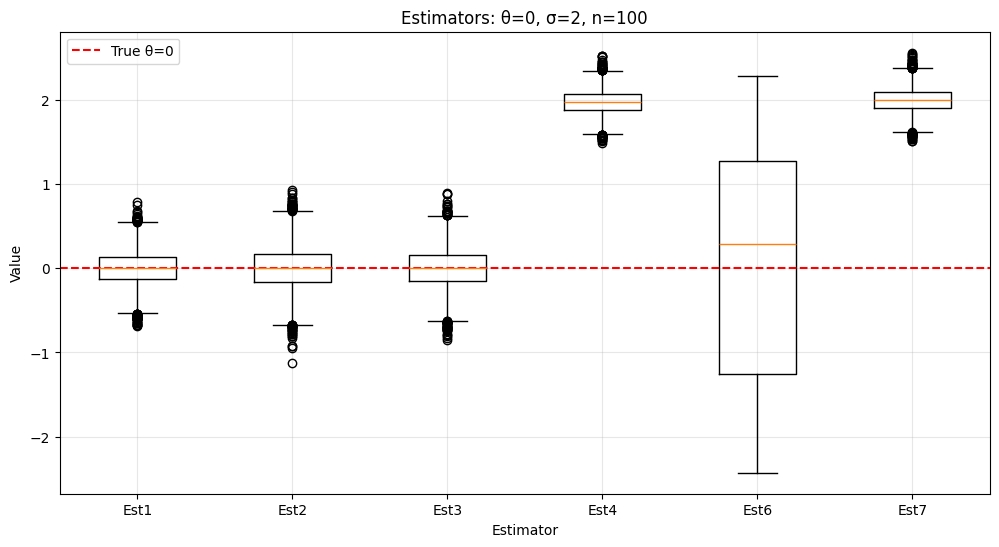


Parameters: n=100, θ=4, σ=1

Statistics:
      Variance    Bias     MSE
Est1    0.0099 -0.0010  0.0099
Est2    0.0152 -0.0013  0.0152
Est3    0.0124 -0.0013  0.0124
Est4    0.0049 -3.0155  9.0984
Est6    0.0098  0.2323  0.0638
Est7    0.0096  0.1209  0.0242


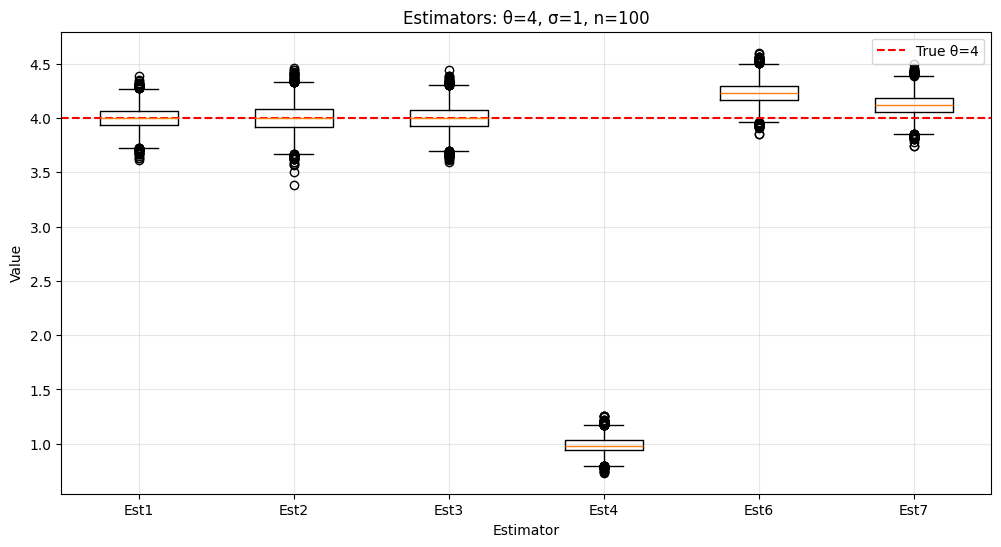


Parameters: n=100, θ=4, σ=2

Statistics:
      Variance    Bias     MSE
Est1    0.0392  0.0001  0.0392
Est2    0.0601 -0.0026  0.0601
Est3    0.0527  0.0002  0.0527
Est4    0.0194 -2.0309  4.1442
Est6    0.0390  0.8119  0.6982
Est7    0.0353  0.4678  0.2542


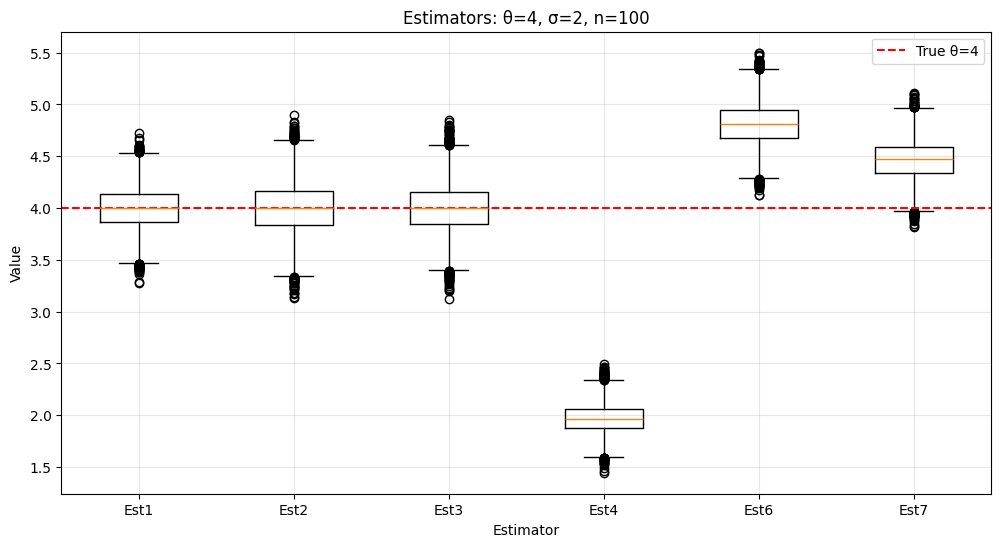

In [13]:
ns = [20, 50, 100]
thetas = [0, 0, 4, 4]
sigmas = [1, 2, 1, 2]

for n in ns:
    for i in range(4):
        theta, sigma = thetas[i], sigmas[i]

        print(f"\n{'='*60}")
        print(f"Parameters: n={n}, θ={theta}, σ={sigma}")
        print(f"{'='*60}")

        res_df, stats_df = run_simulation(theta, sigma, n, num_simulations=10000, exclude_est5=True)

        print("\nStatistics:")
        print(stats_df.round(4))


        # Plot boxplot
        plt.figure(figsize=(12, 6))
        plt.boxplot(res_df)
        plt.title(f'Estimators: θ={theta}, σ={sigma}, n={n}')
        plt.xlabel('Estimator')
        plt.ylabel('Value')
        plt.axhline(y=theta, color='r', linestyle='--', label=f'True θ={theta}')
        plt.gca().set_xticklabels(res_df.columns)
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.show()


## Summary comparison table

# Zadanie 2

In [ ]:
def calculate_statistics_dist(results_df, true_theta):
    """Calculate statistics for distribution comparison"""
    stats = {}
    for col in results_df.columns:
        estimates = results_df[col].values
        variance = np.var(estimates, ddof=1)
        bias = np.mean(estimates) - true_theta
        mse = variance + bias**2

        stats[col] = {
            'Mean': np.mean(estimates),
            'Variance': variance,
            'Bias': bias,
            'MSE': mse
        }

    return pd.DataFrame(stats).T

def run_distribution_comparison(theta, sigma, n, num_simulations=10000):
    """Compare mean and median estimators across different distributions"""
    res_norm = []
    res_cauchy = []
    res_logistic = []

    for _ in range(num_simulations):
        norm_vector = norm.rvs(loc=theta, scale=sigma, size=n)
        cauchy_vector = cauchy.rvs(loc=theta, scale=sigma, size=n)
        logistic_vector = logistic.rvs(loc=theta, scale=sigma, size=n)

        est_norm_mean = norm_vector.mean()
        est_norm_med = np.median(norm_vector)
        res_norm.append([est_norm_mean, est_norm_med])

        est_cauchy_mean = cauchy_vector.mean()
        est_cauchy_med = np.median(cauchy_vector)
        res_cauchy.append([est_cauchy_mean, est_cauchy_med])

        est_logistic_mean = logistic_vector.mean()
        est_logistic_med = np.median(logistic_vector)
        res_logistic.append([est_logistic_mean, est_logistic_med])

    df_norm = pd.DataFrame(res_norm, columns=['Mean', 'Median'])
    df_cauchy = pd.DataFrame(res_cauchy, columns=['Mean', 'Median'])
    df_logistic = pd.DataFrame(res_logistic, columns=['Mean', 'Median'])

    stats_norm = calculate_statistics_dist(df_norm, theta)
    stats_cauchy = calculate_statistics_dist(df_cauchy, theta)
    stats_logistic = calculate_statistics_dist(df_logistic, theta)

    return {
        'norm': (df_norm, stats_norm),
        'cauchy': (df_cauchy, stats_cauchy),
        'logistic': (df_logistic, stats_logistic)
    }


In [ ]:
n = 50
thetas = [0, 0, 4, 4]
sigmas = [1, 2, 1, 2]

for theta, sigma in zip(thetas, sigmas):
    print(f"\n{'='*60}")
    print(f"Distribution Comparison: θ={theta}, σ={sigma}, n={n}")
    print(f"{'='*60}")

    results = run_distribution_comparison(theta, sigma, n, num_simulations=10000)

    # Print statistics
    print("\nNormal Distribution:")
    print(results['norm'][1].round(4))

    print("\nCauchy Distribution:")
    print(results['cauchy'][1].round(4))

    print("\nLogistic Distribution:")
    print(results['logistic'][1].round(4))

    # Plot boxplots
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    axes[0].boxplot(results['norm'][0])
    axes[0].set_title('Normal Distribution')
    axes[0].set_xticklabels(['Mean', 'Median'])
    axes[0].axhline(y=theta, color='r', linestyle='--', alpha=0.7)
    axes[0].grid(True, alpha=0.3)

    axes[1].boxplot(results['cauchy'][0])
    axes[1].set_title('Cauchy Distribution')
    axes[1].set_xticklabels(['Mean', 'Median'])
    axes[1].axhline(y=theta, color='r', linestyle='--', alpha=0.7)
    axes[1].grid(True, alpha=0.3)

    axes[2].boxplot(results['logistic'][0])
    axes[2].set_title('Logistic Distribution')
    axes[2].set_xticklabels(['Mean', 'Median'])
    axes[2].axhline(y=theta, color='r', linestyle='--', alpha=0.7)
    axes[2].grid(True, alpha=0.3)

    fig.suptitle(f'Estimator Comparison: θ={theta}, σ={sigma}, n={n}', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()

# Zadanie 3

In [ ]:
def run_simulation3(k, theta=0, sigma=1, n=49, num_simulations=10000):
    res = []
    for _ in range(num_simulations):
        theta_hat = np.append(norm.rvs(theta, sigma, n), k)

        est_31 = np.mean(theta_hat)
        est_32 = np.median(theta_hat)
        res.append([est_31, est_32])

    columns = ['theta_hat_1', 'theta_hat_2']

    res_df = pd.DataFrame(res, columns=columns)
    stats_df = calculate_statistics(res_df, theta)

    return res_df, stats_df


In [ ]:
theta = 0
sigma = 1
n = 49

for k in range(10, 101, 10):
    res_df, stats_df = run_simulation3(k, theta=theta, sigma=sigma, n=n, num_simulations=10000)

    print(f'\nStatistics:   k={k}')
    print(stats_df.round(4))

    # Plot boxplot
    plt.figure(figsize=(12, 6))
    plt.boxplot(res_df)
    plt.title(f'Estimators: θ={theta}, σ={sigma}, n={n + 1}, k={k}')
    plt.xlabel('Estimator')
    plt.ylabel('Value')
    plt.axhline(y=theta, color='r', linestyle='--', label=f'True θ={theta}')
    plt.gca().set_xticklabels(['Mean', 'Median'])
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

# Zadanie 4

In [ ]:
def est_41(theta_hat, n):
    return np.sum((theta_hat - np.mean(theta_hat)) ** 2) / (n - 1)

def est_42(theta_hat, n):
    return np.sum((theta_hat - np.median(theta_hat)) ** 2) / (n - 1)

def est_43(theta_hat, n):
    return np.median((theta_hat - np.mean(theta_hat)) ** 2)

In [ ]:
def run_simulation4(theta, sigma, n, num_simulations=10000):
    """
    Run simulation for given parameters and return results with statistics
    """
    res = []

    for _ in range(num_simulations):
        theta_hat = norm.rvs(theta, sigma, n)

        res.append([
            est_41(theta_hat, n),
            est_42(theta_hat, n),
            est_43(theta_hat, n),
        ])

    columns = ['Est1', 'Est2', 'Est3']

    res_df = pd.DataFrame(res, columns=columns)
    stats_df = calculate_statistics(res_df, sigma**2)

    return res_df, stats_df

In [ ]:
n = 50
thetas = [0, 0, 4, 4]
sigmas = [1, 4, 1, 4]

for i in range(4):
    theta, sigma = thetas[i], sigmas[i]

    print(f"\n{'='*60}")
    print(f"Parameters: n={n}, θ={theta}, σ={sigma}")
    print(f"{'='*60}")

    res_df, stats_df = run_simulation4(theta, sigma, n, num_simulations=10000)

    print("\nStatistics:")
    print(stats_df.round(4))

    # Plot boxplot
    plt.figure(figsize=(12, 6))
    plt.boxplot(res_df)
    plt.title(f'Estimators: θ={theta}, σ={sigma}, n={n}')
    plt.xlabel('Estimator')
    plt.ylabel('Value')
    plt.axhline(y=sigma**2, color='r', linestyle='--', label=f'True σ²={sigma**2}')
    plt.gca().set_xticklabels(res_df.columns)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()
